## 목표 : 무게에 따른 길이 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 타깃/라벨 : 길이
- 학습 방법 : 지도학습 + 예측 ==> KNN 기반 회귀
- 학습/테스트 데이터 : 7:3 준비

### (1) 라이브러리 로드

In [154]:
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
import sklearn
import pandas as pd
import numpy as np
import re



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [155]:
df = pd.read_csv('../data/fish.csv', usecols=['Species', 'Weight', 'Length'])
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [156]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [157]:
dfPerch = df[df['Species'] == 'Perch']
dfPerch

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7
74,Perch,40.0,15.0
75,Perch,51.5,16.2
76,Perch,70.0,17.4
77,Perch,100.0,18.0
78,Perch,78.0,18.7
79,Perch,80.0,19.0
80,Perch,85.0,19.6
81,Perch,85.0,20.0


In [158]:
dfPerch.reset_index(drop=True, inplace=True)
dfPerch.drop_duplicates(inplace=True)
dfPerch

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16216\458641713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPerch.drop_duplicates(inplace=True)


,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


In [159]:
dfPerch.describe(include='all')

,Species,Weight,Length
count,55,55.000000,55.000000
unique,1,NaN,NaN
top,Perch,NaN,NaN
freq,55,NaN,NaN
mean,NaN,387.007273,28.000000
std,NaN,348.968704,9.068791
min,NaN,5.900000,8.400000
25%,NaN,122.500000,21.650000
50%,NaN,218.000000,25.600000
75%,NaN,695.000000,36.750000


### (3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포


#### (3-1) 데이터 분포


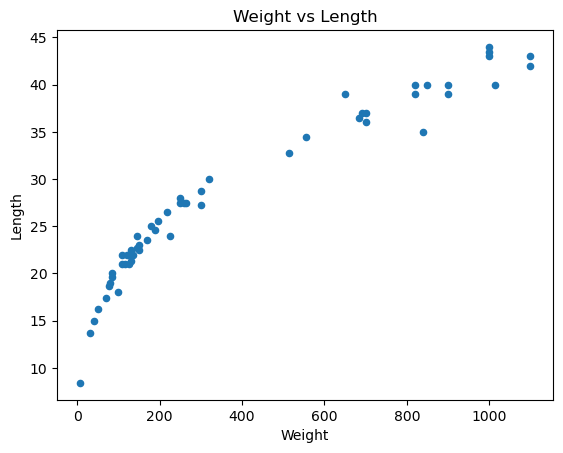

In [160]:
dfPerch.plot(kind='scatter', x = 'Weight', y = 'Length')
plt.title('Weight vs Length')
plt.show()

In [161]:
# 무게와 길이에 대한 상관계수
dfPerch.corr(method='spearman', numeric_only=True)

,Weight,Length
Weight,1.000000,0.986946
Length,0.986946,1.000000


In [162]:
## [분석 결과] 무게에 따른 길이는 비례관계
# 무게 ===연산====> 길이
dfPerch.iloc[:2]
from scipy import stats

stats.linregress(dfPerch.iloc[:2]['Weight'], dfPerch.iloc[:2]['Length'])

LinregressResult(slope=0.20306513409961682, intercept=7.201915708812262, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

In [163]:
stats.linregress(dfPerch['Weight'], dfPerch['Length'])

LinregressResult(slope=0.024905490512413125, intercept=18.361394040856027, rvalue=0.9583677843825917, pvalue=1.6054745041701388e-30, stderr=0.0010192643829092113, intercept_stderr=0.5289772195022716)

In [164]:
from sklearn.model_selection import train_test_split

X = dfPerch[['Weight']]
y = dfPerch['Length']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=81279, 
    # stratify=y, 
)

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### (6) 테스트 <hr>
- 제대로 만들어진 모델인지 확인 과정 
    * 훈련용 데이터에 대한 점수
    * 테스트용 데이터에 대한 점수
    * 훈련 점수와 테스트 점수 비교
        - 훈련점수 > 테스트점수 : 과대적합(Overfitting)
        - 훈련점수 ≒ 테스트점수 : 최적적합
        - 훈련점수 ▼, 테스트점수 ▼ : 과소적합(Underfitting)

In [178]:
from sklearn.neighbors import KNeighborsRegressor
testList = [ ]
trainList = []
# unpatch_sklearn()
# patch_sklearn()
def create_KNN(neightN):
    num = neightN
    knn = KNeighborsRegressor(n_neighbors=num)
    knn.fit(X_train, y_train)
    return knn

for num in range(1,X_train.shape[0]):
    # num = 3
    knn = create_KNN(num)
    testList.append(knn.score(X_test, y_test))
    trainList.append(knn.score(X_train, y_train))

knn = create_KNN(5)

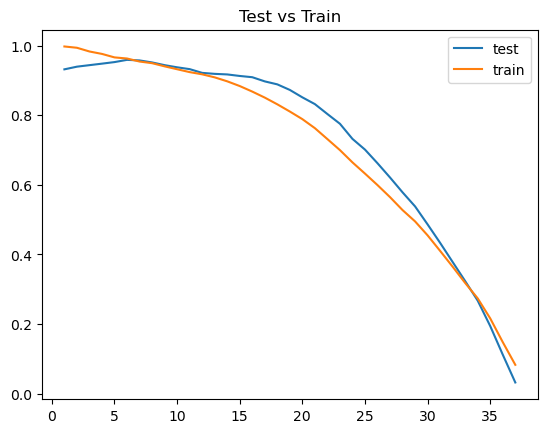

In [173]:
plt.plot(range(1,X_train.shape[0]), testList, label='test')
plt.plot(range(1,X_train.shape[0]), trainList, label='train')
plt.title(
    'Test vs Train'
)
plt.legend()
plt.show()

In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y_test, knn.predict(X_test))

4.022875816993464

In [176]:
mean_absolute_error(y_test, knn.predict(X_test))

1.505882352941177

In [177]:
r2_score(y_test, knn.predict(X_test))

0.9437693651352544